In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

## Create a dataset

In [269]:
X, y = make_classification(
        n_samples=10, 
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=1, 
        n_clusters_per_class=1)
print(X)
print(y)

[[-0.64185521  0.78535215]
 [ 0.10972634  1.83671408]
 [-1.07362634  2.591487  ]
 [-1.38222372  0.85340843]
 [ 1.78689446  2.3841826 ]
 [ 0.94785273  3.53015683]
 [ 1.08876018  1.35925144]
 [ 0.42774158  3.54015499]
 [-0.88398194 -0.57876171]
 [-1.59347411  1.2168913 ]]
[1 0 1 1 0 0 0 0 1 1]


Text(0, 0.5, 'x2')

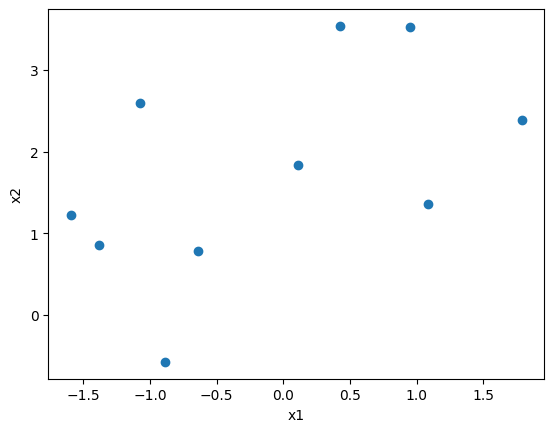

In [270]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel("x1")
plt.ylabel("x2")

In [271]:
X= np.c_[np.ones((X.shape[0],1)),X]
print(X)
d = X.shape[1]


[[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]


## Logistic regression


Logistic regression models the probability that an observation belongs to a particular category.To generate these probabilities, logistic regression uses the sigmoid function. This function maps a real number to a values between 0 and 1.


$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$

In [272]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [273]:
def initialize_thetas(d):
    np.random.seed(0)
    thetas = np.random.randn(d,1)
    return thetas

thetas = initialize_thetas(d)
print(thetas)
# thetas = np.zeros(X.shape[1])
thetas.shape
 

[[1.76405235]
 [0.40015721]
 [0.97873798]]


(3, 1)

In [274]:
#calculate the hypothesis
def calc_h(X,thetas):
    z = np.dot(X,thetas) #linear combination of inputs and weights
    h = sigmoid(z)
    return h
h = calc_h(X,thetas)

In [275]:
print("x=",X)
print("thetas=",thetas)
print("h=",h)

x= [[ 1.         -0.64185521  0.78535215]
 [ 1.          0.10972634  1.83671408]
 [ 1.         -1.07362634  2.591487  ]
 [ 1.         -1.38222372  0.85340843]
 [ 1.          1.78689446  2.3841826 ]
 [ 1.          0.94785273  3.53015683]
 [ 1.          1.08876018  1.35925144]
 [ 1.          0.42774158  3.54015499]
 [ 1.         -0.88398194 -0.57876171]
 [ 1.         -1.59347411  1.2168913 ]]
thetas= [[1.76405235]
 [0.40015721]
 [0.97873798]]
h= [[0.90685823]
 [0.97354817]
 [0.97958421]
 [0.88556398]
 [0.99193866]
 [0.99631003]
 [0.97153159]
 [0.99550418]
 [0.6992785 ]
 [0.91031033]]


## Loss function

The loss function of logistic regression is defined as follows,

\begin{align*}
\mathcal{J}(w) &= - \frac{1}{m} \sum_{i=1}^m y_i \log(h_w(x_i)) + (1-y_i) \log(1-h_w(x_i)) \\
\end{align*}


In [276]:
def calculate_cost(X, y,h,thetas):
    m = len(X)
    h = calc_h(X, thetas)
    cost = (1 / m) * np.sum((-y * np.log(h) - (1 - y) * np.log(1 - h)))
    return cost

cost = calculate_cost(X,y,h,thetas)
cost

17.914093674055604

## Gradient descent

In order to get an accurate prediction, we need to minimise the loss function .This is done by fitting the coefficients.This is done by computing the derivative of the loss function with respect to each coefficient 

$$ 
 w_{j+1} = w_j - \alpha \frac{\partial \mathcal{J}(w)}{\partial w_j} 
$$

In [277]:
def cal_gradient(X,y,h):
    m = len(X)
    gradient = np.dot(X.T, (h - y.reshape(-1,1))) / m
    return gradient

gradient = cal_gradient(X,y,h)
gradient

array([[0.43104279],
       [0.49558814],
       [1.23562045]])

In [245]:
def update_thetas(thetas,gradient):
    alpha = 0.001
    thetas = thetas - (alpha * gradient)  # Update thetas
    return thetas

thetas = update_thetas(thetas,gradient)
thetas

array([[1.7636213 ],
       [0.39966162],
       [0.97750236]])

## Training the model

repeat these steps in order to fit the coefficients

In [278]:
def gradient_descent(X,y,max_iters=10000,precision=1e-3,alpha=0.01):
    thetas = initialize_thetas(d)
    costs = []
    difference = 1
    iteration = 0

    while difference > precision and iteration < max_iters:
        h = calc_h(X, thetas)
        cost = calculate_cost(X, y,h,thetas)
        costs.append(cost)
        
        gradient = cal_gradient(X, y, h)
        thetas = thetas - (alpha * gradient)
        
        if iteration > 0:
            difference = np.abs(costs[iteration - 1] - cost)
        
        print(f"Iteration: {iteration}, Cost: {cost}")
        iteration += 1
        
        if cost == np.inf:
            print("Reached limit")
            break

    return thetas,iteration,costs

In [247]:
thetas, iteration,costs = gradient_descent(X,y)

Iteration: 0, Cost: 17.914093674055604
Iteration: 1, Cost: 17.791043707618865
Iteration: 2, Cost: 17.66822913879078
Iteration: 3, Cost: 17.54565573574277
Iteration: 4, Cost: 17.42332944633613
Iteration: 5, Cost: 17.301256403639453
Iteration: 6, Cost: 17.17944293156304
Iteration: 7, Cost: 17.057895550607462
Iteration: 8, Cost: 16.936620983721546
Iteration: 9, Cost: 16.815626162265385
Iteration: 10, Cost: 16.69491823207228
Iteration: 11, Cost: 16.574504559603
Iteration: 12, Cost: 16.45439273818473
Iteration: 13, Cost: 16.33459059432526
Iteration: 14, Cost: 16.21510619409286
Iteration: 15, Cost: 16.09594784955006
Iteration: 16, Cost: 15.977124125228276
Iteration: 17, Cost: 15.8586438446292
Iteration: 18, Cost: 15.740516096736606
Iteration: 19, Cost: 15.622750242520684
Iteration: 20, Cost: 15.50535592141556
Iteration: 21, Cost: 15.388343057747807
Iteration: 22, Cost: 15.27172186709249
Iteration: 23, Cost: 15.155502862530657
Iteration: 24, Cost: 15.039696860779708
Iteration: 25, Cost: 14.92

## plot the loss function

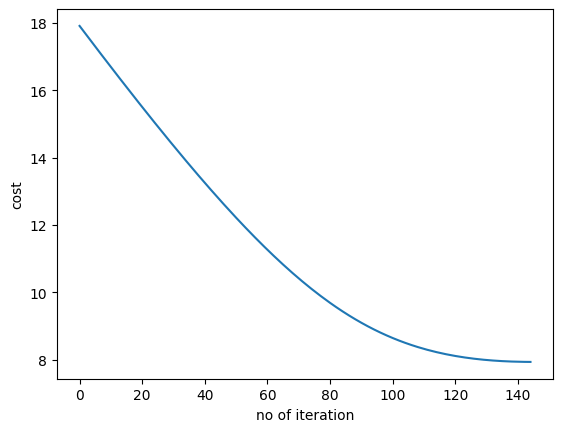

In [279]:
plt.plot(costs)
plt.xlabel("no of iteration")
plt.ylabel("cost")

plt.show()

## Making predictions

In [280]:
pred_prob = calc_h(X,thetas)
pred_prob

array([[0.90685823],
       [0.97354817],
       [0.97958421],
       [0.88556398],
       [0.99193866],
       [0.99631003],
       [0.97153159],
       [0.99550418],
       [0.6992785 ],
       [0.91031033]])

In [281]:
threshold = 0.5
predictions = (pred_prob >= threshold).astype(int)
print("Predicted Class Labels:\n", predictions)

Predicted Class Labels:
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [287]:
new_x = np.array([[0.15, 0.65], [0.25, 0.75], [0.35, 0.85]])  
new_x = np.c_[np.ones((new_x.shape[0], 1)), new_x]
print(new_x)
preds_prob_new_x = calc_h(new_x, thetas)
print("predicted output for the new observation: ", preds_prob_new_x)

[[1.   0.15 0.65]
 [1.   0.25 0.75]
 [1.   0.35 0.85]]
predicted output for the new observation:  [[0.9213082 ]
 [0.93074211]
 [0.93911978]]
